# Moran process simulation

On each time step, one colour is chosen at random to be born, and the other one dies. This is slightly different than the true Moran process in which the same individual can be born and die in a timestep. 

We're also going to modify it in that the probability doesn't depend on the number of individuals, which is maybe not physical? How to motivate that? 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [136]:
N = 10 # population size
p_red = 2/3 # probability that red dies
p_blue = 1 - p_red

f_init = 0.5 # initial frequency of red

In [137]:
n_iter_list = []
f_list = []

n_total = 1000
for i in range(n_total):
    n_iter = 0
    f = f_init
    while round(f,2) != 0 and round(f,2) != 1:
        p = np.random.rand()
        if p > p_red:
            f += 1/N
        else:
            f -= 1/N
        n_iter +=1
    n_iter_list.append(n_iter)
    
    f_list.append(f)

    

In [138]:
np.unique(f_list, return_counts=True)

(array([2.77555756e-17, 1.00000000e+00]), array([959,  41]))

In [139]:
totals, bins = np.histogram(f_list, bins = 2)

/home/madeleine/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


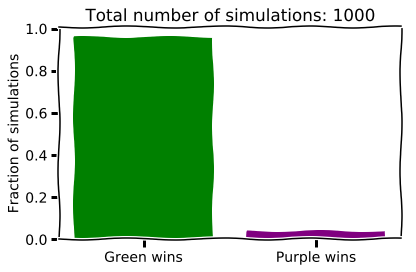

In [140]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar([0,1],totals/np.sum(totals), color = ['green', 'purple'])
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Green wins', 'Purple wins'])
    ax.set_ylabel("Fraction of simulations")
    ax.set_title("Total number of simulations: %s" %n_total)
    plt.tight_layout()
    plt.savefig("moran_sim_green_8.png", dpi = 200)

In [141]:
freqs = np.unique(f_list, return_counts=True)[1]
freq_blue = freqs[0]/freqs[1]

In [142]:
freq_blue

23.390243902439025

In [143]:
len(bins)

3

In [144]:
bins

array([2.77555756e-17, 5.00000000e-01, 1.00000000e+00])

/home/madeleine/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


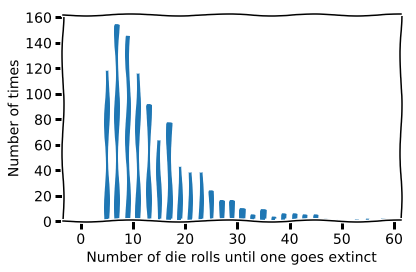

In [145]:
n_iters, bins = np.histogram(n_iter_list, bins= np.arange(0, np.max(n_iter_list)+1))

with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar(bins[:-1],n_iters)
    #ax.set_xticks([0,1])
    #ax.set_xticklabels(['Green wins', 'Purple wins'])
    ax.set_ylabel("Number of times")
    ax.set_xlabel("Number of die rolls until one goes extinct")
    #ax.set_title("Total number of simulations: %s" %n_total)
    plt.tight_layout()
    plt.savefig("n_iter_dist.png", dpi = 200)

Possible outcomes:
* keep a mixture of red and blue forever
* red wins
* blue wins

I'm thinking the two-colour tokens might make things more confusing, because 'death' and 'birth' aren't as obvious?

Alternate method: use N = 6, one die is the selector, the other determines what happens depending on the colour. 

Example (equal probability): population is R B R R B B 
* roll one die, get 5
* roll second die: get 4. Probabilities are equal: if it's 1-3 nothing happens, if 4-6 then flip 
-> population is R B R R R B

In the equal probability case you could skip the second die and just flip whichever token is selected.

Example (unequal probability): population is R B R R B B

* roll one die, get 5. Chosen token is blue. Will it die or be born? Options are blue dies, blue is born, or blue dies, red is born.
* roll second die: if it's 1 through 4, flip. Otherwise, it stays.

In [7]:
N = 6 # population size
p_red = 1/3 # probability that red dies
p_blue = 1 - p_red

f_init = 0.5 # initial frequency of red

In [8]:
0^1

1

In [9]:
n_iter_list = []
f_list = []

for i in range(1000):
    n_iter = 0
    f = f_init

    organism_list = np.array([1,1,1,0,0,0])

    while round(f,2) != 0 and round(f,2) != 1:
        organism = np.random.randint(0,6)
        p = np.random.rand() 
        if p > p_red:
            if organism_list[organism] == 0: # if blue, then flip
                organism_list[organism] = organism_list[organism]^1 # bitwise flip
        elif p <= p_red:
            if organism_list[organism] == 1: # if red, then flip
                organism_list[organism] = organism_list[organism]^1 # bitwise flip
        n_iter +=1
        f = np.sum(organism_list)/6

    n_iter_list.append(n_iter)
    f_list.append(f)

(array([211., 196., 152., 112.,  64.,  53.,  56.,  37.,  22.,  27.,  15.,
         13.,  11.,   7.,   5.,   4.,   1.,   2.,   3.,   2.,   2.,   2.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.        ,  13.66666667,  24.33333333,  35.        ,
         45.66666667,  56.33333333,  67.        ,  77.66666667,
         88.33333333,  99.        , 109.66666667, 120.33333333,
        131.        , 141.66666667, 152.33333333, 163.        ,
        173.66666667, 184.33333333, 195.        , 205.66666667,
        216.33333333, 227.        , 237.66666667, 248.33333333,
        259.        , 269.66666667, 280.33333333, 291.        ,
        301.66666667, 312.33333333, 323.        ]),
 <a list of 30 Patch objects>)

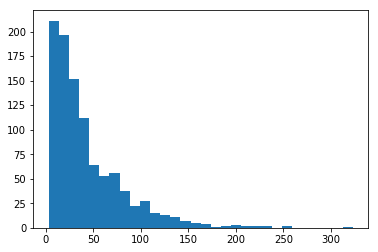

In [10]:
plt.hist(n_iter_list, bins = 30)

(array([ 58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 942.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

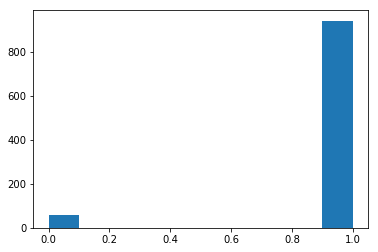

In [11]:
plt.hist(f_list)

## Plots for title screen

In [100]:
# random walk

N = 6 # population size
p_red = 0.5 # probability that red dies
p_blue = 1 - p_red

f_init = 0.5 # initial frequency of red

trajectories = []

n_iter_max = 0
for n in range(20):
    trajectory = [f_init]
    n_iter = 0
    f = f_init
    while round(f,2) != 0 and round(f,2) != 1:
        p = np.random.rand()
        if p > p_red:
            f += 1/N
        else:
            f -= 1/N
        n_iter +=1
        trajectory.append(f)
    trajectories.append(trajectory)
    if n_iter > n_iter_max:
        n_iter_max = n_iter

In [106]:
for i, traj in enumerate(trajectories):
    if round(traj[-1],3) == 0:
        print("extinct")
        print(i, len(traj))
    else:
        print(i, len(traj))
        

extinct
0 8
1 6
extinct
2 4
3 8
4 10
extinct
5 4
6 4
7 6
extinct
8 10
extinct
9 4
10 8
11 12
12 20
extinct
13 10
14 6
15 26
16 6
extinct
17 4
extinct
18 10
19 24


In [71]:
len(trajectories[0])

6

In [72]:
trajectory[:3]

[0.5, 0.6666666666666666, 0.8333333333333333]

In [108]:
!rm frames/*

j = 8
trajectory = trajectories[j]
with plt.xkcd():
    # This figure will be in XKCD-style
    n_iter = len(trajectory)
    
    trajectory = np.array(trajectory)
    
    for i in range(n_iter):
       
        fig, ax = plt.subplots()
        ax.set_xlim(-0.2,n_iter-1+0.2)
        ax.set_ylim(-0.5,N+0.5)
        ax.plot(trajectory[:i+1]*N, 'o', color = 'k', linestyle = '-', linewidth = 3, markersize = 15)
        ax.fill_between(range(i+1), trajectory[:i+1]*N, color= 'purple')
        ax.fill_between(range(i+1), trajectory[:i+1]*N, y2 = [N]*(i+1), color= 'green')
        plt.savefig("frames/frame_%03d.png" % (i,), dpi = 100)
        plt.close()
        
# make gif using ImageMagick
import glob, os

gif_name = 'random_walk%s' %j 

file_list = glob.glob('frames/*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case

with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert -delay 1x3 @image_list.txt {}.gif'.format(gif_name)) # x2 means 2 frames per second

/home/madeleine/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


0

0

In [27]:
fill_between(x, y1, y2=0

array([1, 1, 1, 1, 1, 1])